In [1]:
import pandas as pd
# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# to vectorize text data
from sklearn.feature_extraction.text import TfidfVectorizer

# scikit model used
from sklearn import linear_model

# metrics for model evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# importing training dataset
train = pd.read_csv('ticket_train.csv')

# importing validating dataset
valid = pd.read_csv('ticket_valid.csv')

In [3]:
# top 1 record
train.head(1)

,ticket_type,category,sub_category1,sub_category2,business_service,urgency,impact,info
0,1,5,13,105,32,3,4,search for old outlook thursday octob old hi f...


In [4]:
# top 1 record
valid.head(1)

,ticket_type,category,sub_category1,sub_category2,business_service,urgency,impact,info
0,1,4,1,21,35,3,4,pend expen claim juli pm re pend expen claim h...


In [5]:
# vectorizer instance
tfidf = TfidfVectorizer()

In [13]:
tfidf_train_df =tfidf.fit_transform(train['info'])
tfidf_valid_df =tfidf.transform(valid['info'])

In [14]:
tfidf_train_df.shape,tfidf_valid_df.shape


((38839, 6673), (4855, 6673))

In [15]:
# features and target of training dataset
X_train = tfidf_train_df
y_train=train['ticket_type']
# features and target of validating dataset
X_valid = tfidf_valid_df
y_valid = valid['ticket_type']

In [16]:
LRG = linear_model.LogisticRegression(random_state = 35,solver = 'liblinear',multi_class = 'auto').fit(X_train, y_train)

In [17]:
LRG.score(X_train, y_train)

0.9903190092432864

In [18]:
y_valid_preds = LRG.predict(X_valid)

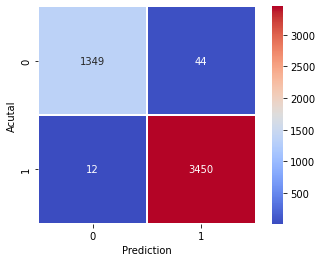

In [19]:
con_mat = confusion_matrix(y_valid,y_valid_preds )
sns.heatmap(con_mat, annot=True, cmap= 'coolwarm',linewidth=2, linecolor='w', fmt='.0f', square=True)
plt.xlabel('Prediction')
plt.ylabel('Acutal')
plt.show()

In [20]:
acc = accuracy_score(y_valid, y_valid_preds)
print(f'Model accuracy score = {acc*100:0.2f}%.')

Model accuracy score = 98.85%.


In [21]:
print(classification_report(y_valid, y_valid_preds))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1393
           1       0.99      1.00      0.99      3462

    accuracy                           0.99      4855
   macro avg       0.99      0.98      0.99      4855
weighted avg       0.99      0.99      0.99      4855



In [22]:
LRG.coef_

array([[-0.55057534, -0.04718453,  0.00339174, ...,  0.8546853 ,
         0.07732472,  0.01206912]])